# Lab 2:  Problem 3

We will now use Newton's method to find the roots to a *complex* function, namely the function
    $$f_C(z) = z^3 - 1.$$
### a)
Write the complex function $f_C: \mathbb{C} \to \mathbb{C}$ as a real vector-valued function $\mathbf{f}: \mathbb{R}^2 \to \mathbb{R}^2$ and write down the Jacobian.  
(*Hint: use rectangular coordinates $z = x_1+\mathrm{i}x_2$)*

<font color='blue'>
    
I will just use sympy since this is more or less trivial anyways. We are only differentiating polynomials after all.

</font>

In [91]:
import sympy as sp
sp.init_printing()

x, y = sp.symbols(['x', 'y'], real=True)

fC = (x + 1j*y)**3 - 1
fC

In [92]:
I, R = sp.im(fC), sp.re(fC)
I, R

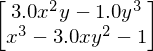

In [93]:
f = sp.Matrix([I, R])
f

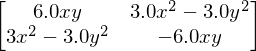

In [94]:
Jac_f = f.jacobian([x, y])
Jac_f

### b)
Write a function $\texttt{Newton}$ which performs Newton iteration until $\|\mathbf{f}(\mathbf{x}^k)\|_p$ is smaller than some given tolerance $tol$. You can choose what $p$-norm $\|\cdot\|_p$ you use. The function should take as input parameters  
 - Initial guess $\mathbf{x}^{(0)}$
 - tolerance $tol$
 - Maximum number of iterations $itermax$.  

The function should return the final iterate $\mathbf{x}^{(k)}$, and some indication of whether the iteration converged. 

In [95]:
# some work up front so we can evaluate the inverse jacobian
iJac_f = Jac_f.inv()

Ji = sp.lambdify([x, y], iJac_f, 'numpy')
# Ji = Ji(x, y) at this point

f = sp.lambdify([x, y], np.squeeze(f), 'numpy')

In [116]:
# As alway we start by importing the important libraries.
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

def Newton(x0, tol=1e-6, itermax=25):
    
    # Destructuring to scalars means we don't have to think
    # about list vs. tuple vs. numpy array, because they all
    # destructure properly.
    xk, yk = x0
    
    converged = False
    
    for _ in range(itermax):
        # Newton step: x <- x - inv(J)F(x)
        xk, yk = (xk, yk) - Ji(xk, yk) @ f(xk, yk)
        
        if la.norm(f(xk, yk)) < tol:
            converged = True
            break
    
    return (xk, yk), converged

In [117]:
newton([-1,1])

((-0.4999999999999554, 0.8660254037846933), True)

### c)
The function $\mathbf{f}$ has exactly three roots. (Which?) Hence, if the iteration converges it might converge to any of the three roots. You will now study the dependence on initial guess to which root the iteration converges. Pick $N$ equidistant values of $x^{(0)}_1$ in the interval $[-1,1]$ and $N$ equidistant values of $x^{(0)}_2$ in the interval $[-1,1]$. For each point $\mathbf{x}^{(0)} = (x^{(0)}_1, x^{(0)}_2)^T$, perform the newton iteration you have defined above. Give the point a color depending on whether the iteration converged in time. If the iteration converged, the point should get a different color depending on which point it converged to. Plot the result.

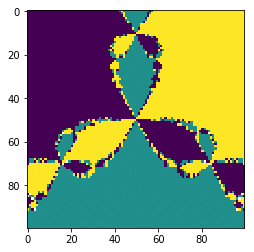

In [146]:
N = 100 # even number of points conveniently excludes 0
xs = np.linspace(-1, 1, N)
ys = np.linspace(-1, 1, N)

R = np.zeros((N, N), dtype=float)

supress = True # supress warning about points that didnt converge

for x in range(N):
    for y in range(N):
        (rx, ry), c = newton([xs[x], ys[y]])
        
        if not c and not supress:
            print(f"Did not converge starting from ({xs[x]},{ys[y]})")
        
        R[x, y] = np.angle(rx + 1j*ry) if c else None
        
import matplotlib.pyplot as plt
plt.imshow(R);

*Hint 1: You will encounter an error if you try with the initial guess $\mathbf{x}^{(0)} = \mathbf{0}$. It might be good to offset all initial guesses by some small perturbation $\mathbf{\delta}$.*     

*Hint 2: A good way to measure which root the iteration converged to is looking at the argument if the point as a complex number, that is $$\arg(x^{(k)}_1 + \mathrm{i}x^{(k)}_2).$$ Store the result in a $N\times N$ array. If the iteration did not converge, the point can be given the value* **None**. *The result can then be plotted using the matplotlib.pyplot function $\texttt{imshow}$.*

### d)
Discuss the following: Does it matter what $p$-norm you use in your Newton algorithm? What happens if you change norm? Does the result change qualitively? Remember that the $p$-norm on $\mathbb{R}^n$  is defined as
$$
\|\mathbf{x}\|_p := \left(\sum_{k=1}^n|x_k|^p\right)^{1/p}
$$
for $1<p<\infty$.

<font color='blue'>
    All norms on $ \mathbb R ^n $ are equivalent.
    If a sequence is convergent with respect to one norm, it is also convergent (with the same limit) with respect to any equivalent norm.
    That means the image would not change much qualitatively, but since we limit the number of steps we could possibly get a small change in the result.
    Take for example the slightly silly norm $2 ||\cdot||$ (just the double of $||\cdot||$).
    Every convergent sequence obviously converges to the same limit with respect to this norm,
    but since the norm is strictly bigger for all vectors except the zero vector, our numerical algorithm would have to run more iterations to squeeze the norm below the tolerance.
</font>

### e) (Not mandatory)
Modify your Newton function so that it returns the number of iterations used. Then, plot the number of iterations used for each initial guess $\mathbf{x}^{(0)}.$ What do you observe?

I have already done (similar) in another course, actually,
and a (very) high-resolution version of that plot can be seen
[here](https://raw.githubusercontent.com/steffenhaug/nm/master/a2/hires.png).
Generating another plot with the same amount of detail takes an absurd amount of time since python is so slow, so I won't do it again, since the problem is optional.
The color in this plot depends on (1) which root it converged to, and (2) the number of iterations.

### Remark
If you colored the plot according to the hint, the white parts are called the *Julia set* of the rational function $$Q(z) = z - \frac{f_C(z)}{f_C'(z)}.$$ The colored parts are called *Fatou components.* If you would like to more about the plot above and others like it, there is a link to the wikipedia page of [Julia sets](https://en.wikipedia.org/wiki/Julia_set).